In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import numpy as np

# Path to the TensorBoard log directory
# Function to read data from TensorBoard logs
def read_tensorboard_logs(log_dir):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()

    # Extract scalar data
    scalar_data = ea.scalars.Items(['test_acc'][0])

    # Separate the data into x and y
    x_values = [event.step for event in scalar_data]
    y_values = [event.value for event in scalar_data]

    return x_values, y_values

In [3]:
def read_client_acc(log_dir, client_id):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()

    # Extract scalar data
    label = 'test_acc/client' + str(client_id)
    scalar_data = ea.scalars.Items([label][0])

    # Separate the data into x and y
    x_values = [event.step for event in scalar_data]
    y_values = [event.value for event in scalar_data]

    return x_values, y_values

def get_mean_std(path, num_clients):
    accs = []
    for i in range(num_clients):
        x_values, y_values = read_client_acc(path, i)
        best_acc = max(y_values)
        accs.append(best_acc)
    return np.mean(accs), np.std(accs)



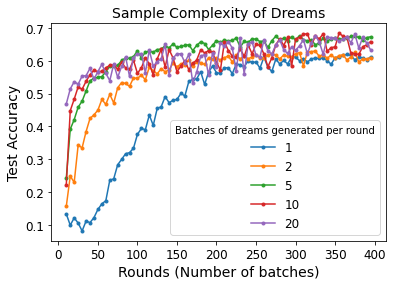

In [4]:

# Read data from TensorBoard logs
log_dir_1 = 'expt_dump/cifar10/iid/iid_clients_feddream_fast_cifar10_4clients_1000samples_fast_local_steps_5_nx_samples_1_optimizer_type_avg_seed4/logs/tensorboard'
log_dir_10 = 'expt_dump/cifar10/iid/iid_clients_feddream_fast_cifar10_4clients_1000samples_fast_local_steps_5_nx_samples_10_optimizer_type_avg_seed4/logs/tensorboard'
log_dir_2 = 'expt_dump/cifar10/iid/iid_clients_feddream_fast_cifar10_4clients_1000samples_fast_local_steps_5_nx_samples_2_optimizer_type_avg_seed4/logs/tensorboard'
log_dir_20 = 'expt_dump/cifar10/iid/iid_clients_feddream_fast_cifar10_4clients_1000samples_fast_local_steps_5_nx_samples_20_optimizer_type_avg_seed4/logs/tensorboard'
log_dir_5 = 'expt_dump/cifar10/iid/iid_clients_feddream_fast_cifar10_4clients_1000samples_fast_local_steps_5_nx_samples_5_optimizer_type_avg_seed4/logs/tensorboard'
x_1, y_1 = read_tensorboard_logs(log_dir_1)
x_2, y_2 = read_tensorboard_logs(log_dir_2)
x_5, y_5 = read_tensorboard_logs(log_dir_5)
x_10, y_10 = read_tensorboard_logs(log_dir_10)
x_20, y_20 = read_tensorboard_logs(log_dir_20)

# Create a line plot
plt.plot(x_1, y_1, marker='o', linestyle='-', markersize=3, label='1')
plt.plot(x_2, y_2, marker='o', linestyle='-', markersize=3, label='2')
plt.plot(x_5, y_5, marker='o', linestyle='-', markersize=3, label='5')
plt.plot(x_10, y_10, marker='o', linestyle='-', markersize=3, label='10')
plt.plot(x_20, y_20, marker='o', linestyle='-', markersize=3, label='20')

# Add labels and title
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Rounds (Number of batches)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.title('Sample Complexity of Dreams', fontsize=14)
plt.legend(title='Batches of dreams generated per round', fontsize=12)

# Display the plot
plt.savefig(f"sample_complexity.pdf", bbox_inches='tight')
plt.show()


In [6]:
path = 'expt_dump/cifar10/alpha_0.1/non_iid_balanced_clients_avgkd_het_cifar10_4clients_1000samples_10_algo_avgkd_alpha_0.1_seed4/logs/tensorboard'
get_mean_std(path, 4)

(0.3017749935388565, 0.033452007006566406)

In [4]:
def get_mean_std_runs(paths, num_clients, server=False):
    accs = []
    for path in paths:
        if server==True:
            x_values, y_values = read_tensorboard_logs(path)
            best_acc = max(y_values)
            accs.append(best_acc)
        else:
            for i in range(num_clients):
                x_values, y_values = read_client_acc(path, i)
                best_acc = max(y_values)
                accs.append(best_acc)
    return np.mean(accs), np.std(accs)

In [6]:
paths = [
    'expt_dump/svhn/alpha_0.1/non_iid_balanced_clients_fl_svhn_4clients_1000samples_10_algo_fedavg_alpha_0.1_seed4/logs/tensorboard',
    'expt_dump/svhn/alpha_0.1/non_iid_balanced_clients_fl_svhn_4clients_1000samples_10_algo_fedavg_alpha_0.1_seed1/logs/tensorboard',
    'expt_dump/svhn/alpha_0.1/non_iid_balanced_clients_fl_svhn_4clients_1000samples_10_algo_fedavg_alpha_0.1_seed2/logs/tensorboard',
]
get_mean_std_runs(paths, num_clients=4, server=False)

(0.4550297160943349, 0.2252765293251386)